# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t0_repeat_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,140.236946,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
0,466.0,568.0,632.0,617.0,760.0,903.0,901.0,832.0,975.0,1018.0,...,1623.0,1531.0,1699.0,1554.0,1689.0,1581.0,1668.0,1674.0,1591.0,1731.0
1,453.0,561.0,660.0,729.0,803.0,816.0,885.0,909.0,905.0,1053.0,...,1733.0,1631.0,1720.0,1647.0,1656.0,1682.0,1624.0,1648.0,1779.0,1676.0
2,492.0,526.0,732.0,756.0,831.0,831.0,873.0,869.0,1040.0,1010.0,...,1714.0,1630.0,1739.0,1739.0,1821.0,1762.0,1823.0,1675.0,1765.0,1718.0
3,462.0,558.0,659.0,746.0,806.0,845.0,899.0,852.0,981.0,1039.0,...,1680.0,1726.0,1720.0,1746.0,1853.0,1752.0,1851.0,1823.0,1874.0,1849.0
4,433.0,534.0,653.0,723.0,842.0,860.0,914.0,856.0,1023.0,1036.0,...,1832.0,1829.0,1906.0,1835.0,1826.0,1783.0,1856.0,1811.0,1880.0,1965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,396.0,544.0,644.0,665.0,748.0,770.0,780.0,814.0,826.0,926.0,...,1335.0,1554.0,1429.0,1448.0,1499.0,1461.0,1553.0,1485.0,1517.0,1520.0
330,391.0,500.0,656.0,643.0,733.0,783.0,803.0,798.0,826.0,884.0,...,1349.0,1419.0,1457.0,1437.0,1575.0,1438.0,1600.0,1511.0,1557.0,1552.0
331,361.0,503.0,643.0,603.0,730.0,769.0,774.0,826.0,900.0,880.0,...,1404.0,1522.0,1575.0,1463.0,1540.0,1555.0,1543.0,1567.0,1543.0,1643.0
332,414.0,435.0,598.0,641.0,710.0,782.0,788.0,786.0,839.0,872.0,...,1496.0,1462.0,1605.0,1446.0,1522.0,1401.0,1626.0,1438.0,1485.0,1460.0


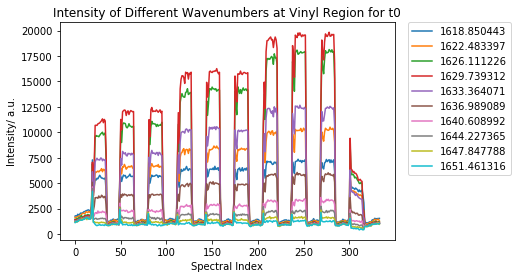

In [3]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region for t0')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [4]:
# df.loc[:,'1629.739312'] --> When using loc.
df.columns.get_loc('1629.739312') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label '1629.739312'. Use relevant parameter for iloc and loc respectively.

378

# Filter Relevant Spectra

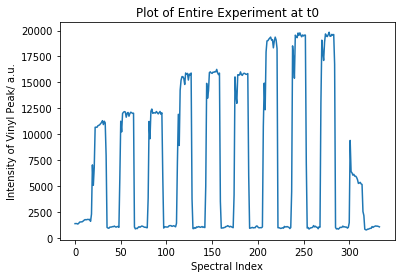

In [5]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:,'1629.739312'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t0')
plt.show()

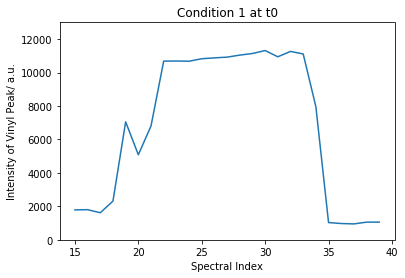

In [6]:
# Condition 
condition1 = df.iloc[15:40,:] 
condition1.loc[:,'1629.739312'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 at t0')
plt.ylim(0,13000) # Zoom in to relevant spectral range.
plt.show()

In [7]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = condition1.loc[26:30, :]
condition1_ss.insert(loc = 0, column = 'Condition', value =19)
condition1_ss

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
26,19,8807.0,9770.0,10275.0,9889.0,9158.0,8148.0,7535.0,6704.0,6301.0,...,131.0,117.0,203.0,154.0,139.0,110.0,173.0,186.0,147.0,170.0
27,19,8794.0,10074.0,10352.0,9955.0,9132.0,8275.0,7304.0,6770.0,6389.0,...,135.0,138.0,200.0,199.0,221.0,173.0,208.0,152.0,152.0,177.0
28,19,9149.0,10044.0,10476.0,9780.0,8925.0,8271.0,7495.0,6675.0,6271.0,...,195.0,131.0,206.0,183.0,151.0,156.0,190.0,146.0,144.0,153.0
29,19,8838.0,10082.0,10433.0,9932.0,9173.0,8376.0,7239.0,6721.0,6172.0,...,123.0,174.0,173.0,83.0,193.0,114.0,139.0,146.0,143.0,134.0
30,19,9004.0,10047.0,10478.0,10033.0,9329.0,8251.0,7429.0,6906.0,6420.0,...,166.0,142.0,188.0,167.0,185.0,156.0,208.0,105.0,170.0,160.0


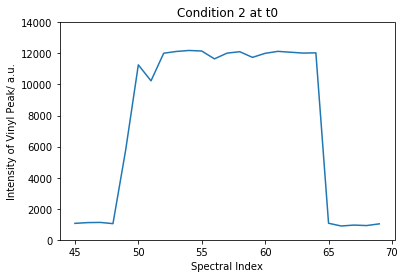

In [8]:
# condition 
condition2 = df.iloc[45:70,:] 
condition2.loc[:,'1629.739312'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 2 at t0')
plt.ylim(0,14000) # Zoom in to relevant spectral range.
plt.show()

In [9]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = condition2.loc[57:61, :]
condition2_ss.insert(loc = 0, column = 'Condition', value =20)
condition2_ss

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
57,20,9011.0,10181.0,10401.0,10184.0,9325.0,8454.0,7476.0,6921.0,6398.0,...,132.0,67.0,124.0,119.0,163.0,78.0,151.0,123.0,115.0,72.0
58,20,9028.0,10171.0,10336.0,9970.0,9212.0,8507.0,7622.0,6983.0,6402.0,...,146.0,44.0,187.0,98.0,133.0,92.0,161.0,113.0,129.0,100.0
59,20,9182.0,10201.0,10513.0,9884.0,9246.0,8396.0,7629.0,6709.0,6491.0,...,143.0,120.0,131.0,131.0,129.0,174.0,143.0,155.0,122.0,114.0
60,20,9092.0,9969.0,10636.0,9977.0,9204.0,8384.0,7476.0,7026.0,6430.0,...,76.0,89.0,131.0,122.0,128.0,78.0,162.0,94.0,118.0,121.0
61,20,8799.0,10235.0,10497.0,9899.0,9187.0,8524.0,7712.0,6841.0,6408.0,...,77.0,121.0,197.0,84.0,159.0,113.0,179.0,121.0,84.0,102.0


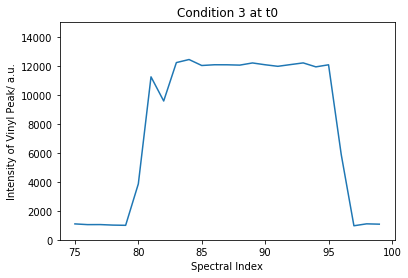

In [10]:
# Condition
condition3 = df.iloc[75:100,:] 
condition3.loc[:,'1629.739312'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 3 at t0')
plt.ylim(0,15000) # Zoom in to relevant spectral range.
plt.show()

In [11]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = condition3.loc[90:94, :]
condition3_ss.insert(loc = 0, column = 'Condition', value =21)
condition3_ss

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
90,21,9079.0,10045.0,10586.0,10132.0,9477.0,8556.0,7626.0,6902.0,6538.0,...,127.0,125.0,162.0,81.0,131.0,102.0,126.0,96.0,112.0,85.0
91,21,8984.0,10121.0,10349.0,10119.0,9188.0,8491.0,7438.0,6785.0,6585.0,...,117.0,107.0,149.0,142.0,124.0,109.0,143.0,128.0,104.0,85.0
92,21,8939.0,10231.0,10741.0,10352.0,9436.0,8513.0,7475.0,6638.0,6380.0,...,110.0,95.0,150.0,107.0,93.0,124.0,189.0,119.0,89.0,106.0
93,21,8992.0,10265.0,10609.0,10116.0,9230.0,8538.0,7425.0,6794.0,6323.0,...,87.0,144.0,186.0,81.0,130.0,99.0,111.0,129.0,43.0,101.0
94,21,8920.0,10137.0,10533.0,10059.0,9155.0,8429.0,7641.0,6831.0,6400.0,...,96.0,108.0,146.0,96.0,140.0,137.0,206.0,88.0,94.0,125.0


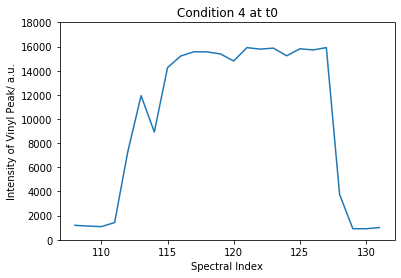

In [12]:
# Condition
condition4 = df.iloc[108:132,:] 
condition4.loc[:,'1629.739312'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 4 at t0')
plt.ylim(0,18000) # Zoom in to relevant spectral range.
plt.show()

In [13]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = condition4.loc[121:125, :]
condition4_ss.insert(loc = 0, column = 'Condition', value =22)
condition4_ss

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
121,22,9518.0,10993.0,11032.0,10924.0,9959.0,8963.0,8566.0,7606.0,7237.0,...,122.0,108.0,123.0,123.0,147.0,121.0,173.0,114.0,98.0,92.0
122,22,9490.0,10755.0,11020.0,10846.0,10046.0,9003.0,8240.0,7612.0,7165.0,...,97.0,109.0,149.0,112.0,147.0,80.0,149.0,133.0,72.0,106.0
123,22,9531.0,10662.0,11115.0,10752.0,9968.0,9017.0,8266.0,7429.0,6933.0,...,64.0,98.0,123.0,111.0,156.0,118.0,186.0,92.0,124.0,94.0
124,22,9271.0,10506.0,10766.0,10466.0,9650.0,8930.0,8088.0,7200.0,6788.0,...,164.0,220.0,206.0,202.0,216.0,193.0,237.0,214.0,148.0,169.0
125,22,9479.0,10841.0,11133.0,10683.0,10080.0,9026.0,7964.0,7413.0,7035.0,...,117.0,89.0,105.0,101.0,163.0,89.0,138.0,98.0,98.0,93.0


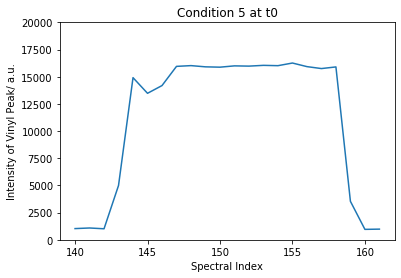

In [14]:
# Condition
condition5 = df.iloc[140:162,:] 
condition5.loc[:,'1629.739312'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 5 at t0')
plt.ylim(0,20000) # Zoom in to relevant spectral range.
plt.show()

In [15]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = condition5.loc[150:154, :]
condition5_ss.insert(loc = 0, column = 'Condition', value =23)
condition5_ss

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
150,23,9579.0,10987.0,11302.0,10973.0,9996.0,9244.0,8383.0,7426.0,7044.0,...,151.0,94.0,115.0,112.0,157.0,170.0,151.0,49.0,175.0,88.0
151,23,9486.0,10748.0,11245.0,10975.0,10009.0,9120.0,8362.0,7858.0,7137.0,...,133.0,60.0,125.0,125.0,154.0,134.0,136.0,102.0,108.0,103.0
152,23,9543.0,10783.0,11419.0,10765.0,10148.0,9203.0,8363.0,7743.0,6986.0,...,80.0,100.0,169.0,123.0,187.0,132.0,158.0,135.0,179.0,120.0
153,23,9509.0,10744.0,11216.0,10897.0,10052.0,9038.0,8256.0,7637.0,7073.0,...,92.0,96.0,126.0,104.0,178.0,141.0,104.0,135.0,88.0,99.0
154,23,9620.0,10809.0,11200.0,10963.0,9942.0,9017.0,8422.0,7779.0,6979.0,...,67.0,88.0,160.0,111.0,150.0,117.0,151.0,72.0,136.0,95.0


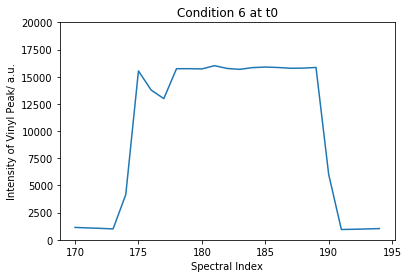

In [16]:
# Condition
condition6 = df.iloc[170:195,:] 
condition6.loc[:,'1629.739312'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 6 at t0')
plt.ylim(0,20000) # Zoom in to relevant spectral range.
plt.show()

In [17]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = condition6.loc[183:187, :]
condition6_ss.insert(loc = 0, column = 'Condition', value =24)
condition6_ss

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
183,24,9593.0,10880.0,11244.0,10762.0,10155.0,9151.0,8323.0,7659.0,7028.0,...,114.0,129.0,143.0,142.0,182.0,90.0,171.0,143.0,127.0,108.0
184,24,9499.0,10858.0,11066.0,10603.0,9957.0,9037.0,8357.0,7536.0,7004.0,...,96.0,60.0,110.0,75.0,118.0,93.0,190.0,105.0,105.0,93.0
185,24,9509.0,11028.0,11143.0,10599.0,9934.0,8939.0,8235.0,7500.0,7012.0,...,149.0,108.0,114.0,116.0,173.0,111.0,185.0,114.0,124.0,104.0
186,24,9513.0,10632.0,11173.0,10530.0,9831.0,9103.0,8122.0,7681.0,7151.0,...,87.0,135.0,137.0,97.0,140.0,152.0,177.0,101.0,48.0,139.0
187,24,9502.0,10707.0,11108.0,10888.0,10070.0,9058.0,8006.0,7545.0,7020.0,...,149.0,111.0,152.0,130.0,225.0,116.0,156.0,112.0,119.0,88.0


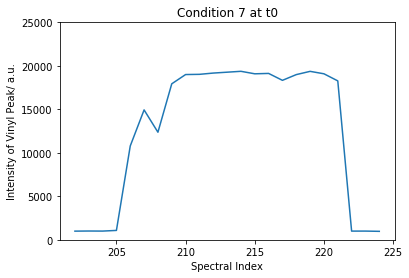

In [18]:
# Condition
condition7 = df.iloc[202:225,:] 
condition7.loc[:,'1629.739312'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 7 at t0')
plt.ylim(0,25000) # Zoom in to relevant spectral range.
plt.show()

In [19]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = condition7.loc[212:216, :]
condition7_ss.insert(loc = 0, column = 'Condition', value =25)
condition7_ss

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
212,25,10166.0,11508.0,11804.0,11573.0,10677.0,9638.0,8762.0,8097.0,7430.0,...,144.0,71.0,160.0,102.0,156.0,125.0,159.0,86.0,118.0,114.0
213,25,10210.0,11374.0,11796.0,11540.0,10644.0,9920.0,8708.0,8101.0,7679.0,...,129.0,115.0,164.0,138.0,151.0,114.0,190.0,118.0,81.0,139.0
214,25,10085.0,11698.0,12128.0,11672.0,10578.0,9741.0,8846.0,8300.0,7705.0,...,88.0,102.0,124.0,92.0,174.0,106.0,122.0,115.0,107.0,118.0
215,25,10032.0,11438.0,11843.0,11553.0,10589.0,9769.0,8812.0,8082.0,7558.0,...,91.0,91.0,130.0,62.0,161.0,110.0,161.0,104.0,96.0,126.0
216,25,10035.0,11486.0,11627.0,11597.0,10467.0,9688.0,8599.0,8094.0,7634.0,...,92.0,125.0,138.0,109.0,128.0,121.0,124.0,64.0,100.0,109.0


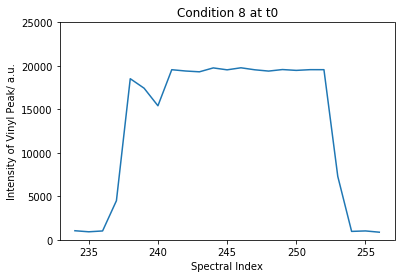

In [20]:
# Condition
condition8 = df.iloc[234:257,:] 
condition8.loc[:,'1629.739312'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 8 at t0')
plt.ylim(0,25000) # Zoom in to relevant spectral range.
plt.show()

In [21]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = condition8.loc[245:249, :]
condition8_ss.insert(loc = 0, column = 'Condition', value =26)
condition8_ss

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
245,26,10127.0,11411.0,11910.0,11574.0,10724.0,9920.0,8780.0,8137.0,7810.0,...,120.0,70.0,175.0,82.0,190.0,94.0,160.0,98.0,129.0,114.0
246,26,10208.0,11574.0,12103.0,11668.0,10840.0,10046.0,9010.0,8293.0,7705.0,...,97.0,74.0,186.0,90.0,114.0,128.0,128.0,79.0,115.0,109.0
247,26,10237.0,11530.0,11996.0,11541.0,10710.0,9827.0,8921.0,8073.0,7691.0,...,100.0,139.0,153.0,173.0,181.0,165.0,190.0,114.0,78.0,150.0
248,26,10184.0,11687.0,11893.0,11601.0,10755.0,9857.0,9051.0,8196.0,7714.0,...,100.0,98.0,172.0,96.0,122.0,137.0,127.0,122.0,117.0,157.0
249,26,10218.0,11577.0,12140.0,11518.0,10861.0,9947.0,9117.0,8098.0,7857.0,...,69.0,53.0,168.0,36.0,133.0,88.0,129.0,76.0,120.0,71.0


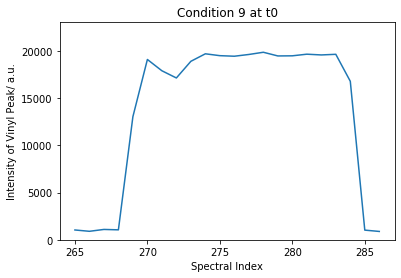

In [22]:
# Condition
condition9 = df.iloc[265:287,:] 
condition9.loc[:,'1629.739312'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 9 at t0')
plt.ylim(0,23000) # Zoom in to relevant spectral range.
plt.show()

In [23]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = condition9.loc[277:281, :]
condition9_ss.insert(loc = 0, column = 'Condition', value =27)
condition9_ss

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
277,27,10088.0,11675.0,12027.0,11732.0,10870.0,9787.0,9151.0,8233.0,7696.0,...,134.0,111.0,178.0,105.0,150.0,134.0,157.0,93.0,90.0,51.0
278,27,10299.0,11598.0,12078.0,11779.0,10687.0,9881.0,8927.0,8092.0,7748.0,...,108.0,108.0,170.0,133.0,109.0,147.0,186.0,85.0,108.0,100.0
279,27,10318.0,11629.0,11793.0,11733.0,10769.0,9872.0,9056.0,8275.0,7650.0,...,89.0,114.0,170.0,91.0,168.0,163.0,159.0,104.0,95.0,155.0
280,27,10130.0,11455.0,12103.0,11521.0,10934.0,9756.0,9314.0,8321.0,7663.0,...,109.0,62.0,151.0,75.0,186.0,114.0,142.0,95.0,90.0,53.0
281,27,10056.0,11805.0,12003.0,11503.0,10738.0,9730.0,8848.0,8121.0,7637.0,...,108.0,80.0,202.0,92.0,134.0,120.0,112.0,133.0,93.0,109.0


In [24]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                 condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
26,19,8807.0,9770.0,10275.0,9889.0,9158.0,8148.0,7535.0,6704.0,6301.0,...,131.0,117.0,203.0,154.0,139.0,110.0,173.0,186.0,147.0,170.0
27,19,8794.0,10074.0,10352.0,9955.0,9132.0,8275.0,7304.0,6770.0,6389.0,...,135.0,138.0,200.0,199.0,221.0,173.0,208.0,152.0,152.0,177.0
28,19,9149.0,10044.0,10476.0,9780.0,8925.0,8271.0,7495.0,6675.0,6271.0,...,195.0,131.0,206.0,183.0,151.0,156.0,190.0,146.0,144.0,153.0
29,19,8838.0,10082.0,10433.0,9932.0,9173.0,8376.0,7239.0,6721.0,6172.0,...,123.0,174.0,173.0,83.0,193.0,114.0,139.0,146.0,143.0,134.0
30,19,9004.0,10047.0,10478.0,10033.0,9329.0,8251.0,7429.0,6906.0,6420.0,...,166.0,142.0,188.0,167.0,185.0,156.0,208.0,105.0,170.0,160.0
57,20,9011.0,10181.0,10401.0,10184.0,9325.0,8454.0,7476.0,6921.0,6398.0,...,132.0,67.0,124.0,119.0,163.0,78.0,151.0,123.0,115.0,72.0
58,20,9028.0,10171.0,10336.0,9970.0,9212.0,8507.0,7622.0,6983.0,6402.0,...,146.0,44.0,187.0,98.0,133.0,92.0,161.0,113.0,129.0,100.0
59,20,9182.0,10201.0,10513.0,9884.0,9246.0,8396.0,7629.0,6709.0,6491.0,...,143.0,120.0,131.0,131.0,129.0,174.0,143.0,155.0,122.0,114.0
60,20,9092.0,9969.0,10636.0,9977.0,9204.0,8384.0,7476.0,7026.0,6430.0,...,76.0,89.0,131.0,122.0,128.0,78.0,162.0,94.0,118.0,121.0
61,20,8799.0,10235.0,10497.0,9899.0,9187.0,8524.0,7712.0,6841.0,6408.0,...,77.0,121.0,197.0,84.0,159.0,113.0,179.0,121.0,84.0,102.0


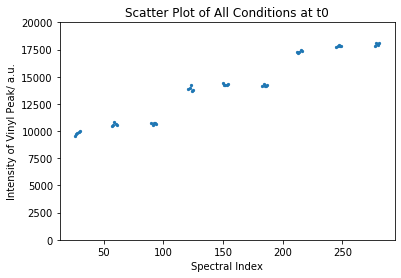

In [25]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions at t0')
plt.ylim(0, 20000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [26]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [27]:
# Inspect df_.
df_

,Condition,99.739764,104.250978,108.760014,113.264746,117.767305,122.267691,126.763784,131.255589,135.749469,...,2470.400811,2473.565296,2476.728552,2479.888961,2483.049763,2486.209339,2489.366072,2492.523197,2495.677482,2498.827313
26,19,8807.0,9770.0,10275.0,9889.0,9158.0,8148.0,7535.0,6704.0,6301.0,...,131.0,117.0,203.0,154.0,139.0,110.0,173.0,186.0,147.0,170.0
27,19,8794.0,10074.0,10352.0,9955.0,9132.0,8275.0,7304.0,6770.0,6389.0,...,135.0,138.0,200.0,199.0,221.0,173.0,208.0,152.0,152.0,177.0
28,19,9149.0,10044.0,10476.0,9780.0,8925.0,8271.0,7495.0,6675.0,6271.0,...,195.0,131.0,206.0,183.0,151.0,156.0,190.0,146.0,144.0,153.0
29,19,8838.0,10082.0,10433.0,9932.0,9173.0,8376.0,7239.0,6721.0,6172.0,...,123.0,174.0,173.0,83.0,193.0,114.0,139.0,146.0,143.0,134.0
30,19,9004.0,10047.0,10478.0,10033.0,9329.0,8251.0,7429.0,6906.0,6420.0,...,166.0,142.0,188.0,167.0,185.0,156.0,208.0,105.0,170.0,160.0
57,20,9011.0,10181.0,10401.0,10184.0,9325.0,8454.0,7476.0,6921.0,6398.0,...,132.0,67.0,124.0,119.0,163.0,78.0,151.0,123.0,115.0,72.0
58,20,9028.0,10171.0,10336.0,9970.0,9212.0,8507.0,7622.0,6983.0,6402.0,...,146.0,44.0,187.0,98.0,133.0,92.0,161.0,113.0,129.0,100.0
59,20,9182.0,10201.0,10513.0,9884.0,9246.0,8396.0,7629.0,6709.0,6491.0,...,143.0,120.0,131.0,131.0,129.0,174.0,143.0,155.0,122.0,114.0
60,20,9092.0,9969.0,10636.0,9977.0,9204.0,8384.0,7476.0,7026.0,6430.0,...,76.0,89.0,131.0,122.0,128.0,78.0,162.0,94.0,118.0,121.0
61,20,8799.0,10235.0,10497.0,9899.0,9187.0,8524.0,7712.0,6841.0,6408.0,...,77.0,121.0,197.0,84.0,159.0,113.0,179.0,121.0,84.0,102.0


In [28]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.739312']].groupby('Condition').describe()

1629.739312                                                  \
                count     mean         std      min      25%      50%   
Condition                                                               
19                5.0  11058.8  176.597565  10877.0  10921.0  11042.0   
20                5.0  12003.0  153.863576  11746.0  12006.0  12020.0   
21                5.0  12052.6  107.811409  11930.0  11968.0  12075.0   
22                5.0  15721.0  277.685974  15232.0  15784.0  15811.0   
23                5.0  15982.6   63.974995  15878.0  15975.0  15998.0   
24                5.0  15807.0   81.335724  15679.0  15780.0  15839.0   
25                5.0  19205.4  115.807167  19085.0  19129.0  19170.0   
26                5.0  19567.6  135.769290  19398.0  19542.0  19547.0   
27                5.0  19596.4  157.818884  19448.0  19461.0  19603.0   

                             
               75%      max  
Condition                    
19         11138.0  11316.0  
20         12110.0  12133.0  
21         12087.0  12203.0  
22         15869.0  15909.0  
23         16016.0  16046.0  
24         15849.0  15888.0  
25         19271.0  19372.0  
26         19574.0  19777.0  
27         19633.0  19837.0

In [29]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201022 High Throughput Experiment Conditions 19 to 27\Online Raman\df_t0_repeat.csv')